In [116]:
import pandas as pd
import numpy as np
import seaborn as sns

In [117]:
df = pd.read_csv('output_summ/Lung_Rxn_SKO_Summary_0.3.csv')
df.columns = ['Series','Safe_down_rxns','Toxic_down_rxns','','']
df = df.iloc[:,:3]
df['all_rxns'] = df['Safe_down_rxns'].astype('str')+','+df['Toxic_down_rxns'].astype('str')

In [118]:
df.head()

,Series,Safe_down_rxns,Toxic_down_rxns,all_rxns
0,s1,"EX_pe_hs(e),EX_sph1p(e),PEt,SPH1Pte,r0787","CLS_hs,DATPtn,DCTPtn,DGTPtn,DSAT,DTTPtn,ENO,EX...","EX_pe_hs(e),EX_sph1p(e),PEt,SPH1Pte,r0787,CLS_..."
1,s15,"ADKd,CDIPTr,CHOLt4,CTPS2,DAGK_hs,DTMPK,DTTPtn,...","CLS_hs,DATPtn,DCTPtn,DGTPtn,DSAT,ENO,EX_his_L(...","ADKd,CDIPTr,CHOLt4,CTPS2,DAGK_hs,DTMPK,DTTPtn,..."
2,s16,"DAGK_hs,DTTPtn,EX_HC00250(e),EX_citr_L(e),EX_l...","CLS_hs,DATPtn,DCTPtn,DGTPtn,DSAT,ENO,EX_his_L(...","DAGK_hs,DTTPtn,EX_HC00250(e),EX_citr_L(e),EX_l..."
3,s2,"EX_pe_hs(e),EX_sph1p(e),PEt,SPH1Pte,r0787","CLS_hs,DATPtn,DCTPtn,DGTPtn,DSAT,DTTPtn,ENO,EX...","EX_pe_hs(e),EX_sph1p(e),PEt,SPH1Pte,r0787,CLS_..."
4,s5,"DTMPK,EX_pe_hs(e),GK1,PEt,TRDR","CLS_hs,DATPtn,DCTPtn,DGTPtn,DSAT,EX_gln_L(e),E...","DTMPK,EX_pe_hs(e),GK1,PEt,TRDR,CLS_hs,DATPtn,D..."


In [88]:
df = df.astype('object')

In [89]:
df = df.loc[~df.Series.isin( ['s15','s16d','mac']),:]

In [90]:
df_uniques = df.groupby('Series').agg({'Safe_down_rxns': lambda x: list(x),'Safe_down_rxns': lambda x: list(x),
                                     'Toxic_down_rxns': lambda x: list(x),'Toxic_down_rxns': lambda x: list(x),
                                      'all_rxns': lambda x: list(x),'all_rxns': lambda x: list(x)})

In [91]:
#df_uniques['all_rxns'] = df_uniques['Safe_down_rxns'].astype('str')+','+df_uniques['Toxic_down_rxns'].astype('str')

In [92]:
#df_uniques['all_rxns'] = df_uniques['all_rxns'].apply(lambda x: x.replace('nan,','').replace('[','').replace(']','').replace("'",''))

In [93]:
df_uniques

,Safe_down_rxns,Toxic_down_rxns,all_rxns
Series,,,
s1,"[EX_pe_hs(e),EX_sph1p(e),PEt,SPH1Pte,r0787, CY...","[CLS_hs,DATPtn,DCTPtn,DGTPtn,DSAT,DTTPtn,ENO,E...","[EX_pe_hs(e),EX_sph1p(e),PEt,SPH1Pte,r0787,CLS..."
s16,"[DAGK_hs,DTTPtn,EX_HC00250(e),EX_citr_L(e),EX_...","[CLS_hs,DATPtn,DCTPtn,DGTPtn,DSAT,ENO,EX_his_L...","[DAGK_hs,DTTPtn,EX_HC00250(e),EX_citr_L(e),EX_..."
s2,"[EX_pe_hs(e),EX_sph1p(e),PEt,SPH1Pte,r0787, AL...","[CLS_hs,DATPtn,DCTPtn,DGTPtn,DSAT,DTTPtn,ENO,E...","[EX_pe_hs(e),EX_sph1p(e),PEt,SPH1Pte,r0787,CLS..."
s5,"[DTMPK,EX_pe_hs(e),GK1,PEt,TRDR, CLS_hs,CYSTGL...","[CLS_hs,DATPtn,DCTPtn,DGTPtn,DSAT,EX_gln_L(e),...","[DTMPK,EX_pe_hs(e),GK1,PEt,TRDR,CLS_hs,DATPtn,..."
s6,"[DTMPK,EX_pe_hs(e),GK1,PEt,TRDR, DAGK_hs,sink_...","[CLS_hs,DATPtn,DCTPtn,DGTPtn,DSAT,EX_gln_L(e),...","[DTMPK,EX_pe_hs(e),GK1,PEt,TRDR,CLS_hs,DATPtn,..."
s7,"[CYTDt,EX_pe_hs(e),PEt,RTOTALFATPc, CYTDt,EX_l...","[CLS_hs,DATPtn,DCTPtn,DGTPtn,DSAT,EX_lys_L(e),...","[CYTDt,EX_pe_hs(e),PEt,RTOTALFATPc,CLS_hs,DATP..."


In [94]:
df_uniques['all_rxns'] = df_uniques['all_rxns'].apply(lambda x: np.unique(np.concatenate([y.split(',') for y in x if y!='nan'])))
df_uniques['Safe_down_rxns'] = df_uniques['Safe_down_rxns'].apply(lambda x: np.unique(np.concatenate([str(y).split(',') for y in x if str(y)])))
df_uniques['Toxic_down_rxns'] = df_uniques['Toxic_down_rxns'].apply(lambda x: np.unique(np.concatenate([str(y).split(',') for y in x if str(y)!='nan'])))

In [95]:
df_uniques

,Safe_down_rxns,Toxic_down_rxns,all_rxns
Series,,,
s1,"[CYSTALArBATtc, EX_Lcystin[e], EX_lys_L[e], EX...","[CLS_hs, DAGK_hs, DATPtn, DCTPtn, DGTPtn, DSAT...","[CLS_hs, CYSTALArBATtc, DAGK_hs, DATPtn, DCTPt..."
s16,"[CRMte, CYSTALArBATtc, DAGK_hs, DTTPtn, EX_HC0...","[CLS_hs, DATPtn, DCTPtn, DGTPtn, DSAT, ENO, EX...","[CLS_hs, CRMte, CYSTALArBATtc, DAGK_hs, DATPtn..."
s2,"[ALAR, CYSTGLUex, EX_pe_hs(e), EX_sph1p(e), PE...","[CLS_hs, DATPtn, DCTPtn, DGTPtn, DSAT, DTTPtn,...","[ALAR, CLS_hs, CYSTGLUex, DATPtn, DCTPtn, DGTP..."
s5,"[CLS_hs, CYSTGLUex, DTMPK, EX_pe_hs(e), EX_trp...","[CLS_hs, DAGK_hs, DATPtn, DCTPtn, DGTPtn, DSAT...","[CLS_hs, CYSTGLUex, DAGK_hs, DATPtn, DCTPtn, D..."
s6,"[DAGK_hs, DTMPK, EX_pe_hs(e), GK1, PEt, TRDR, ...","[CLS_hs, DATPtn, DCTPtn, DGTPtn, DSAT, EX_gln_...","[CLS_hs, DAGK_hs, DATPtn, DCTPtn, DGTPtn, DSAT..."
s7,"[CYTDt, EX_lysargleu[e], EX_pe_hs(e), EX_pe_hs...","[CLS_hs, DATPtn, DCTPtn, DGTPtn, DSAT, EX_lys_...","[CLS_hs, CYTDt, DATPtn, DCTPtn, DGTPtn, DSAT, ..."


In [96]:
df_uniques.all_rxns[0]

array(['CLS_hs', 'CYSTALArBATtc', 'DAGK_hs', 'DATPtn', 'DCTPtn', 'DGTPtn',
       'DSAT', 'DTTPtn', 'ENO', 'EX_HC00250(e)', 'EX_Lcystin[e]',
       'EX_asn_L(e)', 'EX_his_L(e)', 'EX_ile_L(e)', 'EX_inost(e)',
       'EX_inost[e]', 'EX_leu_L(e)', 'EX_lys_L(e)', 'EX_lys_L[e]',
       'EX_met_L(e)', 'EX_pe_hs(e)', 'EX_phe_L(e)', 'EX_ps_hs[e]',
       'EX_sph1p(e)', 'EX_thr_L(e)', 'EX_trp_L(e)', 'EX_val_L(e)', 'GK1',
       'INSTt4', 'PEt', 'PGM', 'PSSA1_hs', 'PSt3', 'RE2954C', 'RNDR1',
       'RTOTALFATPc', 'SMS', 'SPH1Pte', 'TRDR', 'biomass_maintenance',
       'biomass_reaction', 'r0027', 'r0193', 'r0276', 'r0787', 'r0940',
       'sink_asn_L[c]', 'sink_thr_L[c]'], dtype='<U19')

In [97]:
all_rxns = np.concatenate(df_uniques.iloc[:,[1,2]].values.tolist())
all_rxns = np.unique(np.concatenate(all_rxns)) #[x.split(',') for x in all_rxns if x!='nan']
all_rxns = [x for x in all_rxns if x not in ['biomass_maintenance','biomass_reaction']]
all_rxns[:12]

['ALAR',
 'CLS_hs',
 'CRMte',
 'CYSTALArBATtc',
 'CYSTGLUex',
 'CYTDt',
 'DAGK_hs',
 'DATPtn',
 'DCTPtn',
 'DGTPtn',
 'DSAT',
 'DTMPK']

In [98]:
# Replace reaction ids by its subsystem
rxn_name = pd.read_csv('RECON_models_rxn_names.csv')
rxn_name.head()

,rxn,rxnNames,subSystem
0,10FTHF5GLUtl,"5-glutamyl-10FTHF transport, lysosomal","Transport, lysosomal"
1,10FTHF5GLUtm,"5-glutamyl-10FTHF transport, mitochondrial","Transport, mitochondrial"
2,10FTHF6GLUtl,"6-glutamyl-10FTHF transport, lysosomal","Transport, lysosomal"
3,10FTHF6GLUtm,"6-glutamyl-10FTHF transport, mitochondrial","Transport, mitochondrial"
4,10FTHF7GLUtl,"7-glutamyl-10FTHF transport, lysosomal","Transport, lysosomal"


In [99]:
all_subSys = rxn_name.loc[rxn_name.rxn.isin(all_rxns),'subSystem'].unique()
all_subSys

array(['Alanine and aspartate metabolism',
       'Glycerophospholipid metabolism', 'Transport, extracellular',
       'Transport, nuclear', 'Sphingolipid metabolism',
       'Nucleotide interconversion', 'Glycolysis/gluconeogenesis',
       'Exchange/demand reaction', 'Methionine and cysteine metabolism',
       'Cysteine Metabolism', 'Purine catabolism', 'Pyrimidine synthesis',
       'Peptide metabolism'], dtype=object)

In [100]:
df_sparse = pd.DataFrame(np.zeros((len(all_subSys),len(df_uniques.index))),columns =df_uniques.index,index=all_subSys)

In [101]:
# Builind a  matrix of percentage of shared rxns of a pathway in a phenotype

for i in range(df_sparse.shape[0]):
    for k in range(df_sparse.shape[1]):
        subSys = all_subSys[i]
        pheno = df_uniques.index[k]
        pheno_rxns = df_uniques.all_rxns[k]
        subSys_rxns = rxn_name.loc[rxn_name.subSystem ==subSys,'rxn']
        shared_rxns = [x for x in subSys_rxns if x in pheno_rxns]
        pathway_percentage =len( shared_rxns) / len(subSys_rxns)
        df_sparse.iloc[i,k] = pathway_percentage

for i in range(df_sparse.shape[0]):
    for k in range(df_sparse.shape[1]):
        rxn = all_rxns[i]
        pheno = df_uniques.index[k]
        if rxn in df_uniques.loc[pheno,'Toxic_down_rxns']:
            df_sparse.iloc[i,k] = 1
        elif rxn in df_uniques.loc[pheno,'Safe_down_rxns']:
            df_sparse.iloc[i,k] = 2
        else:
            df_sparse.iloc[i,k] = 0

In [102]:
#Remove biomass reactions
#df_sparse = df_sparse.loc[~df_sparse.index.str.lower().str.contains('biomass'),:]

In [103]:
df_sparse.columns

Index(['s1', 's16', 's2', 's5', 's6', 's7'], dtype='object', name='Series')

In [105]:
df_sparse = df_sparse.loc[:,['s2', 's6', 's5', 's16', 's1', 's7']]
df_sparse.columns = [ 'A549_.02', 'A549_.2_ACE2',  'A549_2','A549_2_ACE2','NHBE_2','Calu3_2']

In [106]:
df_sparse

,A549_.02,A549_.2_ACE2,A549_2,A549_2_ACE2,NHBE_2,Calu3_2
Alanine and aspartate metabolism,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000
Glycerophospholipid metabolism,0.009569,0.019139,0.019139,0.028708,0.028708,0.009569
"Transport, extracellular",0.003007,0.002005,0.002255,0.004260,0.003508,0.002506
"Transport, nuclear",0.066116,0.049587,0.049587,0.066116,0.066116,0.049587
Sphingolipid metabolism,0.028571,0.019048,0.019048,0.033333,0.028571,0.019048
Nucleotide interconversion,0.018462,0.024615,0.024615,0.018462,0.018462,0.018462
Glycolysis/gluconeogenesis,0.074074,0.000000,0.000000,0.049383,0.049383,0.000000
Exchange/demand reaction,0.009117,0.008288,0.008288,0.009946,0.009532,0.004973
Methionine and cysteine metabolism,0.041667,0.000000,0.027778,0.041667,0.041667,0.000000
Cysteine Metabolism,0.333333,0.000000,0.000000,0.333333,0.333333,0.000000


In [107]:
#df_sparse = df_sparse.drop(index=['nan'])

In [108]:
from matplotlib import pyplot as plt
#g = sns.clustermap(df_sparse,col_cluster=False)
#g.savefig('Enrichment/DEGs/L1K_Clustered.png', dpi=400,bbox_inches='tight')

In [109]:
#rxn_name = rxn_name.loc[rxn_name.rxn.drop_duplicates().index,:].reset_index(drop=True)

In [110]:
#all_rxns_unmapped_idx = np.where([len(x) == 0  for x in all_rxns_names])[0]
#all_rxns_unmapped = all_rxns[all_rxns_unmapped_idx]
#for i in range(len(all_rxns_unmapped)):
#    all_rxns_names[all_rxns_unmapped_idx[i]]  = all_rxns_unmapped[i]
#all_rxns_names = np.concatenate([all_rxns_names])

In [111]:
#rxn_name = pd.read_csv('bigg_models_reactions.txt',sep='\t')
#all_rxns_names_2 = [ rxn_name.loc[rxn_name.bigg_id==x,'name'].values for x in all_rxns_unmapped]

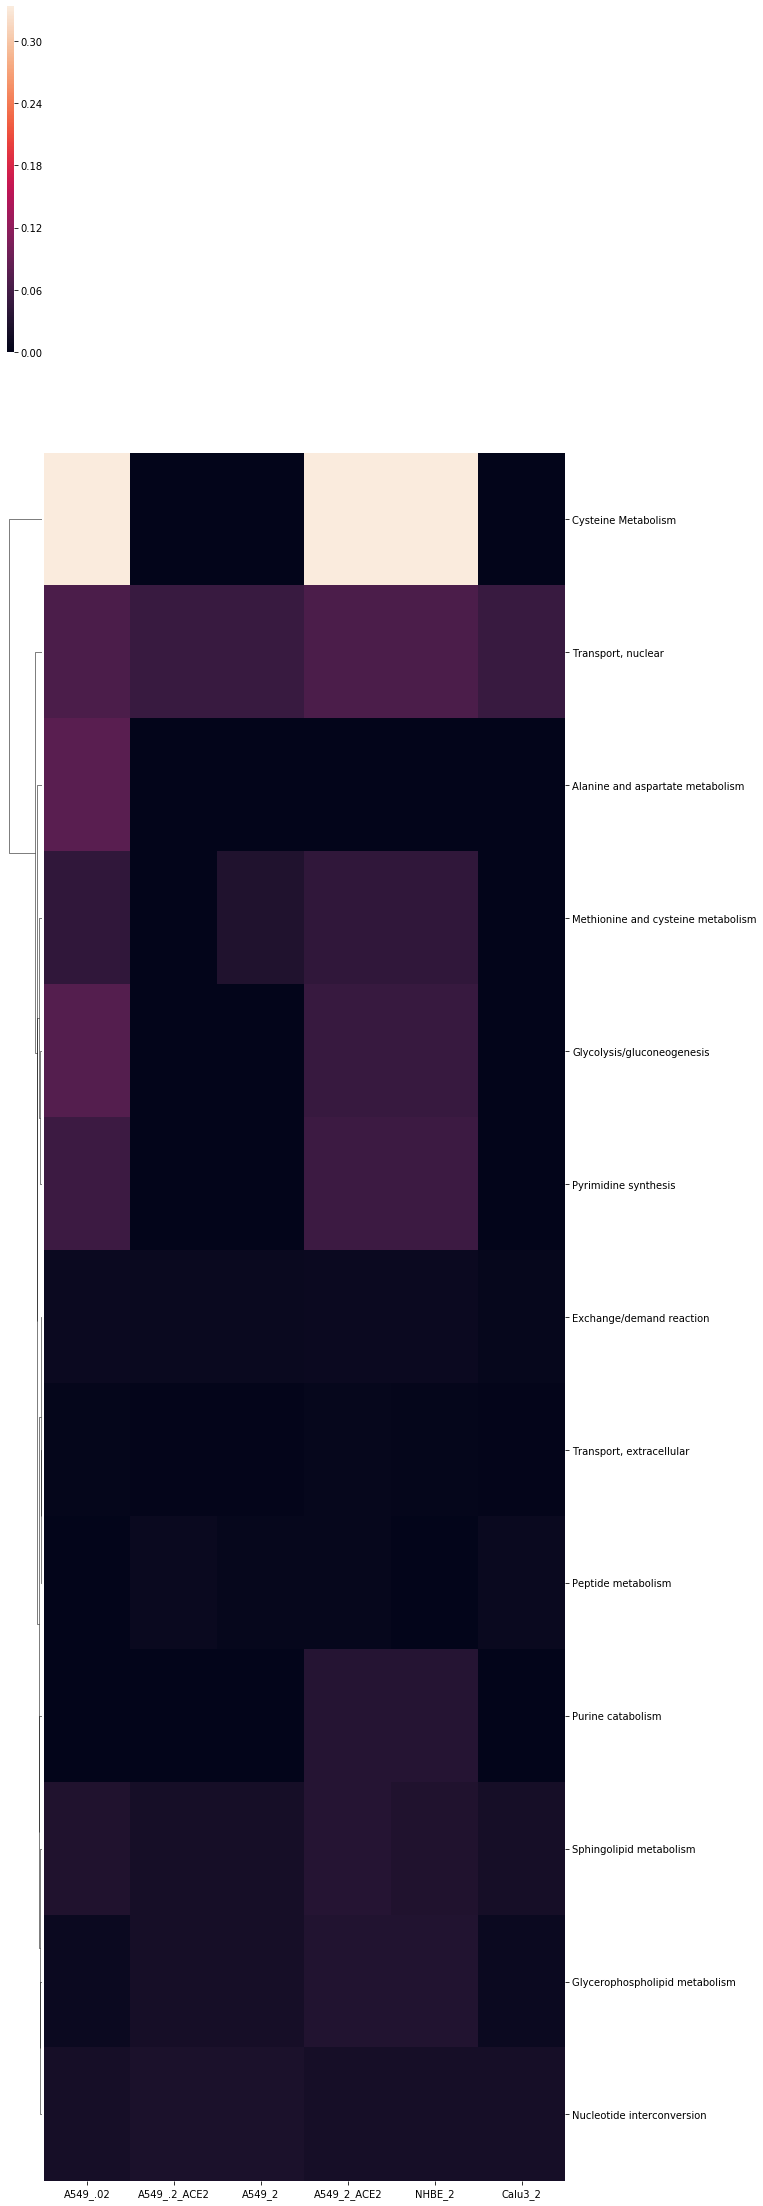

In [113]:
cm = sns.clustermap(df_sparse,col_cluster=False,  yticklabels=True, figsize=(10,40))

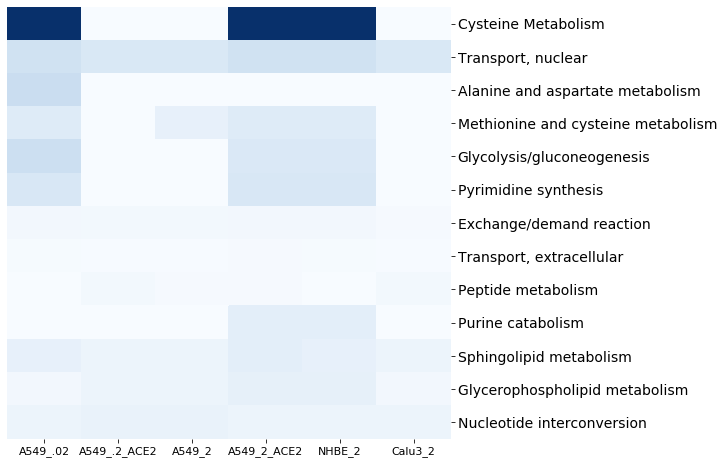

In [115]:
g = sns.clustermap(df_sparse,
                   col_cluster=False,
                   row_cluster=True,
                   mask=False,
                   #standard_scale=0,
                   yticklabels=True,
                   cmap="Blues",
                   #square=True,
                   #figsize=(12,(.3*(len(enrich_coverage_all.index))))
                  )
g.cax.set_visible(False)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize = 11, rotation=0)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize = 14, rotation=0)
#g.savefig('enrichment/SKO_Lung_1_Enrichment.png', dpi=400,bbox_inches='tight')
g.savefig('Figs/RKO_Lung_1_Enrichment.svg', dpi=400,bbox_inches='tight')
g.savefig('Figs/RKO_Lung_1_Enrichment.png', dpi=400,bbox_inches='tight')